# Machine Learning Portfolio 1

In [1]:
#libraries inladen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler
## dataframes inladen
SEED = 1337
test_df = pd.read_csv('test_c.csv')
train_df = pd.read_csv('train_c.csv')
display(test_df.head())
display(train_df.head())

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,1,85,66,29,0,26.6,0.351,31
1,4,0,137,40,35,168,43.1,2.288,33
2,13,1,189,60,23,846,30.1,0.398,59
3,14,5,166,72,19,175,25.8,0.587,51
4,20,3,126,88,41,235,39.3,0.704,27


,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,668,6,98,58,33,190,34.0,0.430,43,0
1,324,2,112,75,32,0,35.7,0.148,21,0
2,624,2,108,64,0,0,30.8,0.158,21,0
3,690,8,107,80,0,0,24.6,0.856,34,0
4,473,7,136,90,0,0,29.9,0.210,50,0


In [2]:
##functie defineren om accuracy te pakken
def get_clf_stats(y_test, pred=None, pred_proba=None):
    """ Dit functie geeft de accuracy, precision, recall, f1 scores en een confusion matrix terug van de y_test en pred.
    
    Parameters:
    -----------
    y_test: Series, the y_test series from the train_test_split.
    
    pred: Series, the predictions on the X_test.
    
    pred_proba: Array, the prediction probability on the X_test.
    
    Returns:
    --------
    print: each score will be printed.
    
    confusion: the confusion matrix.
    """
    
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)   
     
    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion


## opdracht 1: EDA

In [3]:
display(test_df.info())
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      154 non-null    int64  
 1   Pregnancies               154 non-null    int64  
 2   Glucose                   154 non-null    int64  
 3   BloodPressure             154 non-null    int64  
 4   SkinThickness             154 non-null    int64  
 5   Insulin                   154 non-null    int64  
 6   BMI                       154 non-null    float64
 7   DiabetesPedigreeFunction  154 non-null    float64
 8   Age                       154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
 9   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


None

### alle waardes zijn numeriek

In [4]:
def highlight_min(s, props=''):
    """Dit functie highlight het laagste waarde van elk kolom.
    Maak gebruik van DataFrame.style.apply().
    
    Parameters:
    -----------
    s: DataFrame, the dataframe to highlight on.
    
    props: str, the color and background color.
    
    Returns:
    np.where(s == np.nanmin(s.values), props, ''): the DataFrame with highlights.
    --------
    
    """
    return np.where(s == np.nanmin(s.values), props, '')

train_df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.542345,3.809446,120.465798,68.903909,20.456026,81.250814,31.929642,0.468096,33.265472,0.342020
std,222.135103,3.375544,31.959619,19.933385,16.063105,116.947384,8.136791,0.329203,11.851427,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,194.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,380.500000,3.000000,115.000000,72.000000,23.000000,27.000000,32.150000,0.365500,29.000000,0.000000
75%,583.750000,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.628500,41.000000,1.000000
max,767.000000,15.000000,197.000000,114.000000,99.000000,744.000000,67.100000,2.420000,72.000000,1.000000


In [5]:
train_df.isna().sum()

p_id                        0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### er zitten geen nans in de data dus het is geschikt voor machine learning

In [6]:
x_cols = train_df.columns[1:9]
x_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

p_id                       -0.085877
Pregnancies                 0.222939
Glucose                     0.475325
BloodPressure               0.082771
SkinThickness               0.078982
Insulin                     0.124408
BMI                         0.272149
DiabetesPedigreeFunction    0.182245
Age                         0.233461
Outcome                     1.000000
Name: Outcome, dtype: float64


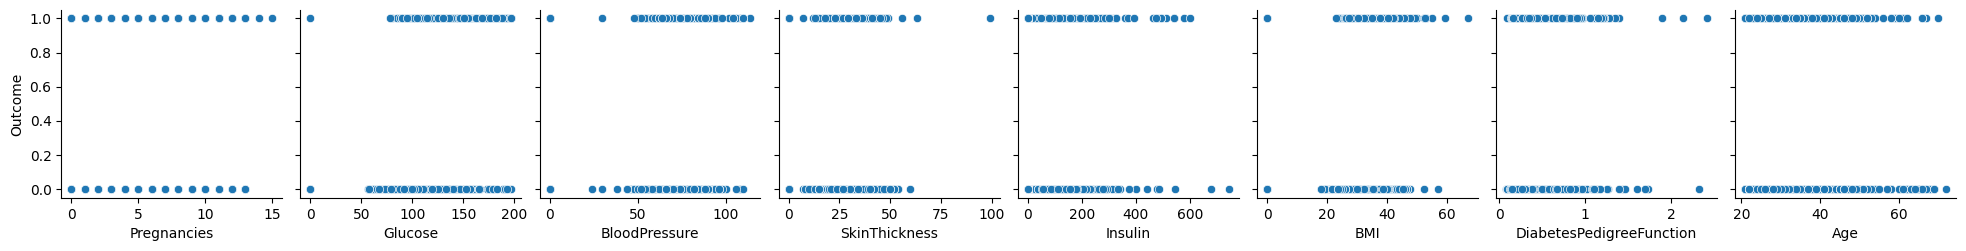

In [7]:
## relaties tussen variabelen laten zien
X = train_df[x_cols]
y = train_df['Outcome']

print(train_df.corr()['Outcome'])
fig = sns.pairplot(
    train_df,
    x_vars=x_cols,
    y_vars='Outcome'
)
plt.show()

## onderzoeken of we moeten standaardiseren en of er outliers in de data  zitten

In [8]:
feature_names = [cname for cname in train_df.loc[:,:'Age'].columns]

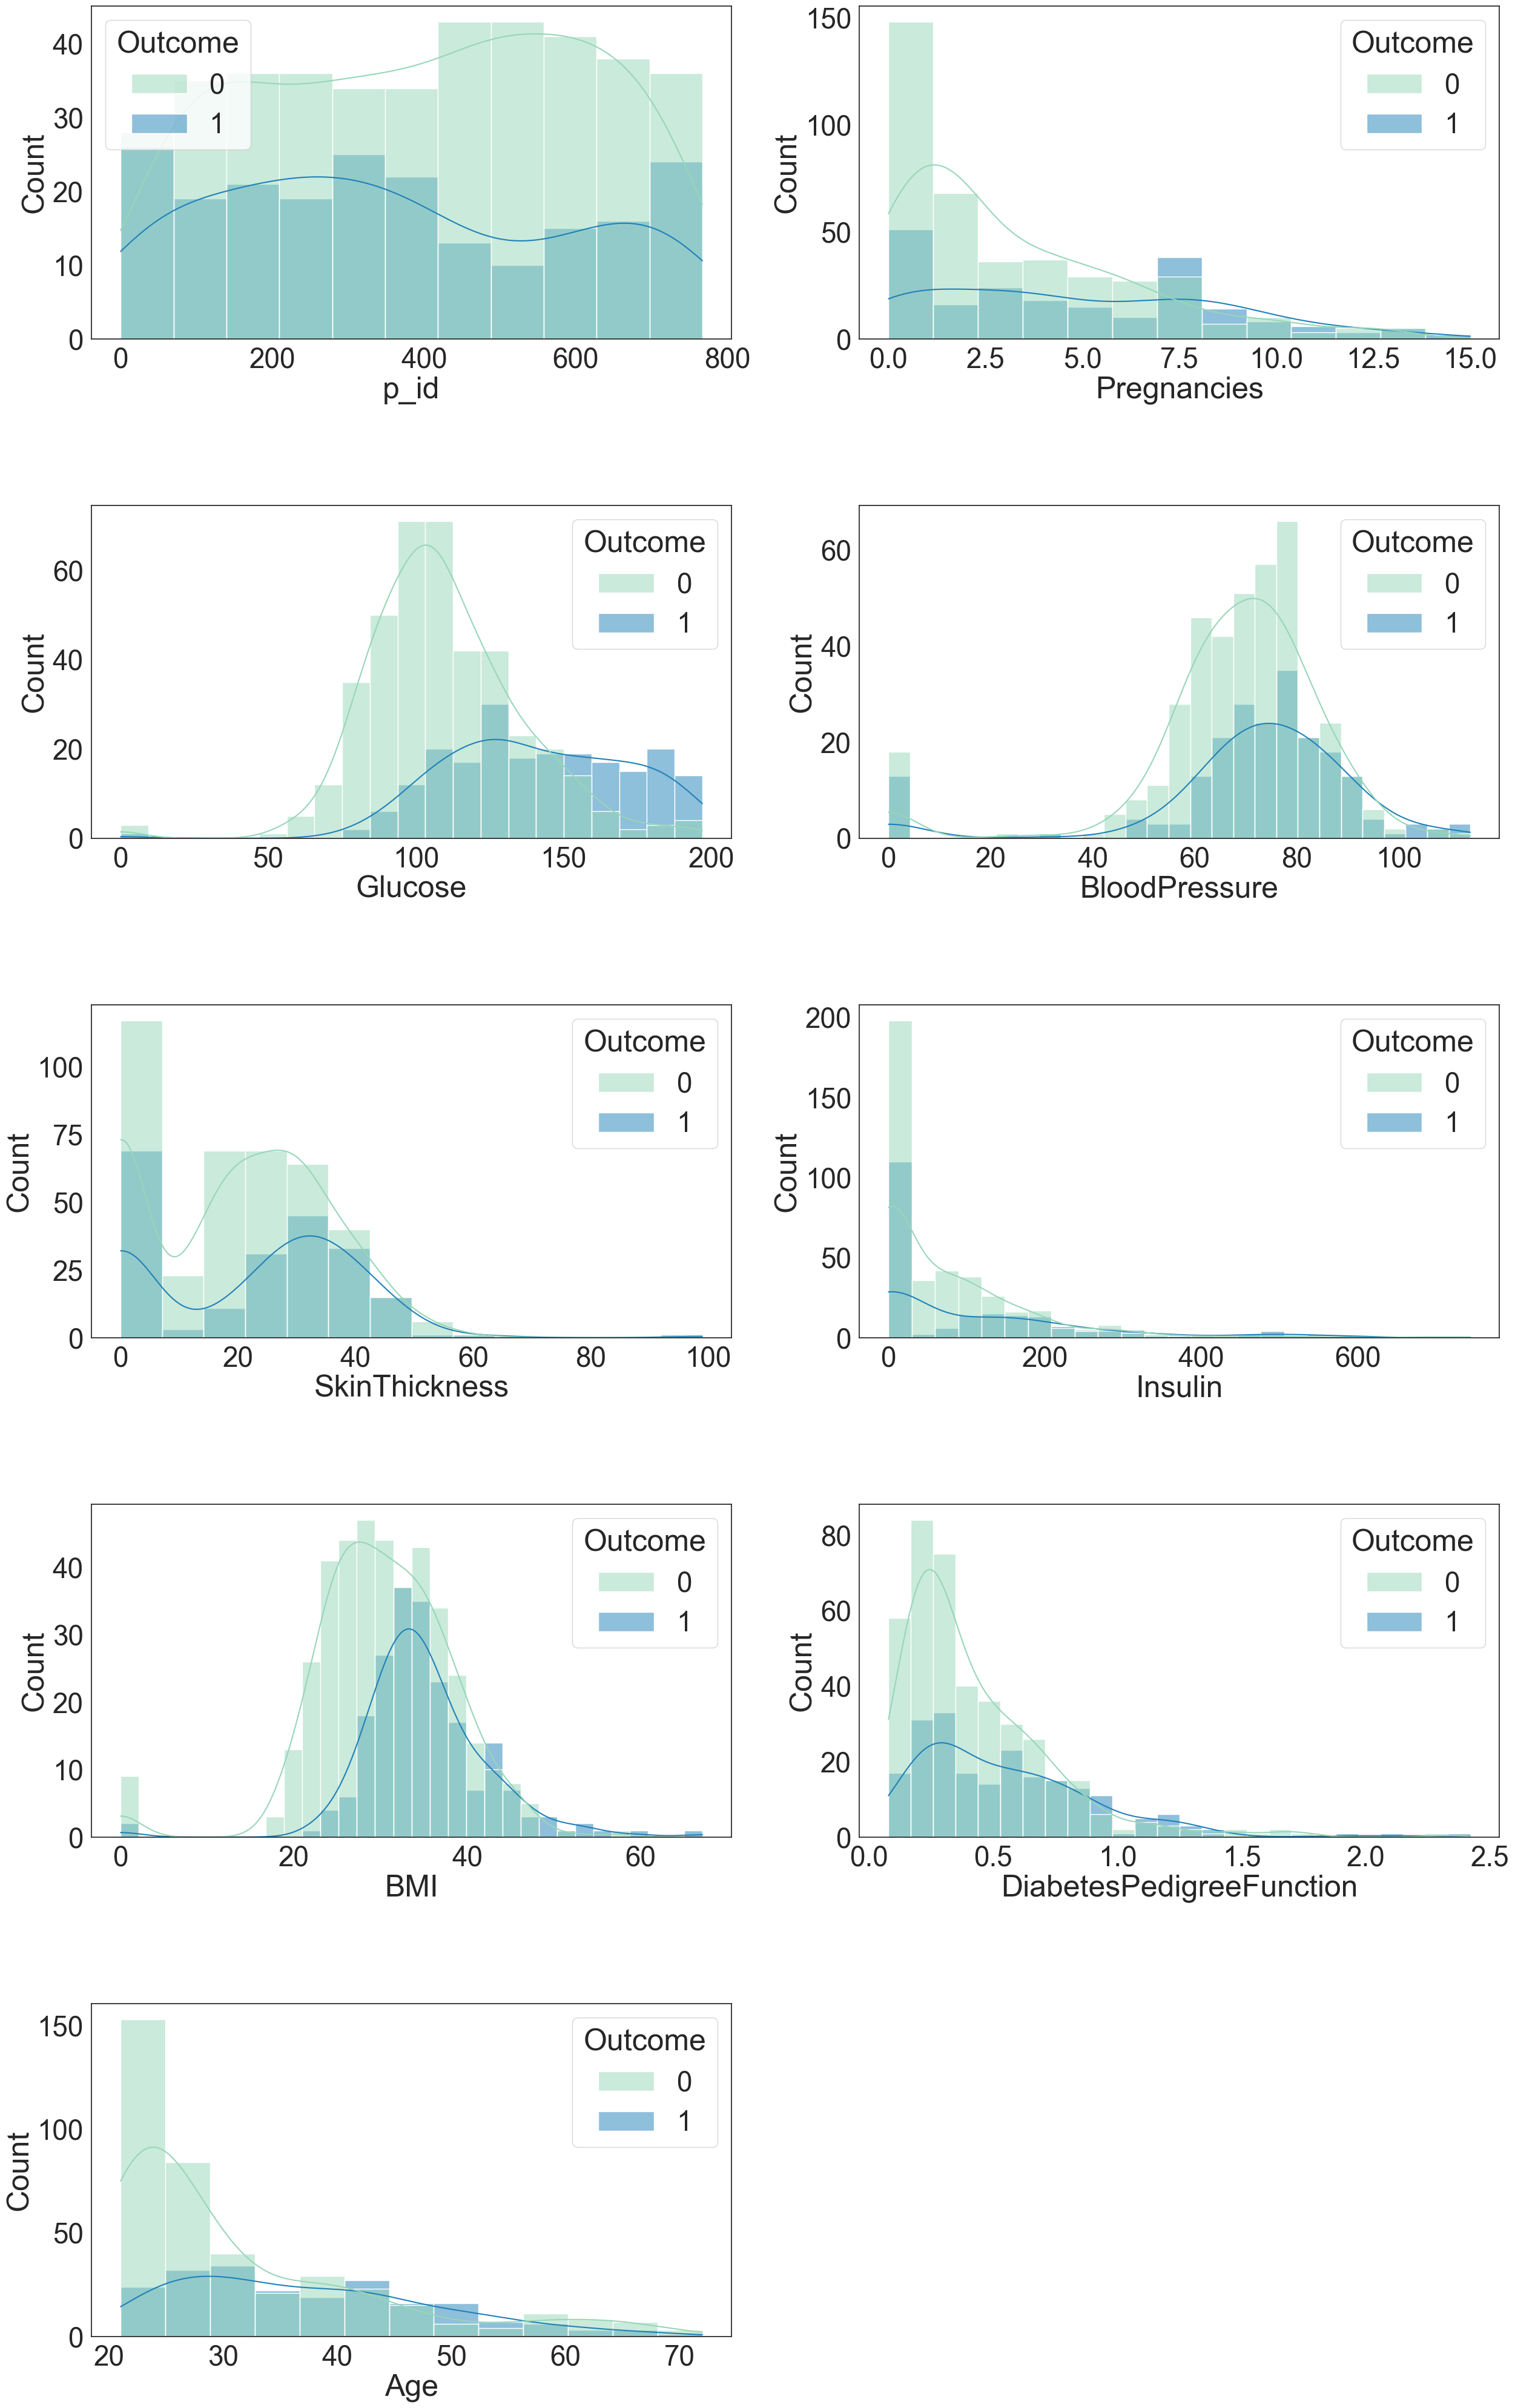

In [9]:
rcParams['figure.figsize'] = 30,50
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=train_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

### het is een goed idee om alle nul waardes die niet hier horen te imputen met een knn model en ook outliers verwijderen en imputen

We zoeken hier outliers in de data. Iets is een outlier als het buiten de iqr valt. We vervangen deze waardes met nan om ze later ook te imputen.

In [10]:
train_df.head()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,668,6,98,58,33,190,34.0,0.430,43,0
1,324,2,112,75,32,0,35.7,0.148,21,0
2,624,2,108,64,0,0,30.8,0.158,21,0
3,690,8,107,80,0,0,24.6,0.856,34,0
4,473,7,136,90,0,0,29.9,0.210,50,0


In [11]:
for x in ['Pregnancies']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['Glucose']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['BloodPressure']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['SkinThickness']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['BMI']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['DiabetesPedigreeFunction']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['Age']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

In [12]:
train_df.isna().sum()

p_id                         0
Pregnancies                  2
Glucose                      4
BloodPressure               40
SkinThickness                1
Insulin                      0
BMI                         19
DiabetesPedigreeFunction    21
Age                          7
Outcome                      0
dtype: int64

dit model zoekt data dat lijkt op data met de zelfde kenmerken en maakt zo "echte" data aan

In [13]:
## nul waardes uit de desbetreffende features vervangen met nan
train_df[['Glucose','BloodPressure','SkinThickness','BMI']] = train_df[['Glucose',
                                                                                 'BloodPressure','SkinThickness','BMI']].replace(0, np.NaN)

Features waar de nul waardes vervangen zijn met NaN zijn:
- Glucose
- BloodPressure
- SkinThickness
- BMI

We hebben de nul waardes van Insulin niet vervangen, omdat de feature een waarde aangeeft van een 2 hour serum insulin. Als de persoon geen serum insulin heeft genomen, dan is het waarde 0.

In [14]:
## alle nans imputen
imputer = KNNImputer(n_neighbors=3, weights='uniform')
imputed = imputer.fit_transform(train_df)
train_df_imp = pd.DataFrame(imputed, columns=train_df.columns)
train_df_imp

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,668.0,6.0,98.0,58.0,33.000000,190.0,34.0,0.430,43.0,0.0
1,324.0,2.0,112.0,75.0,32.000000,0.0,35.7,0.148,21.0,0.0
2,624.0,2.0,108.0,64.0,23.333333,0.0,30.8,0.158,21.0,0.0
3,690.0,8.0,107.0,80.0,22.666667,0.0,24.6,0.856,34.0,0.0
4,473.0,7.0,136.0,90.0,36.000000,0.0,29.9,0.210,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...
609,384.0,1.0,125.0,70.0,24.000000,110.0,24.3,0.221,25.0,0.0
610,224.0,1.0,100.0,66.0,15.000000,56.0,23.6,0.666,26.0,0.0
611,729.0,2.0,92.0,52.0,27.333333,0.0,30.1,0.141,22.0,0.0
612,630.0,7.0,114.0,64.0,25.000000,0.0,27.4,0.732,34.0,1.0


In [15]:
feature_names = [cname for cname in train_df.loc[:,:'Age'].columns]

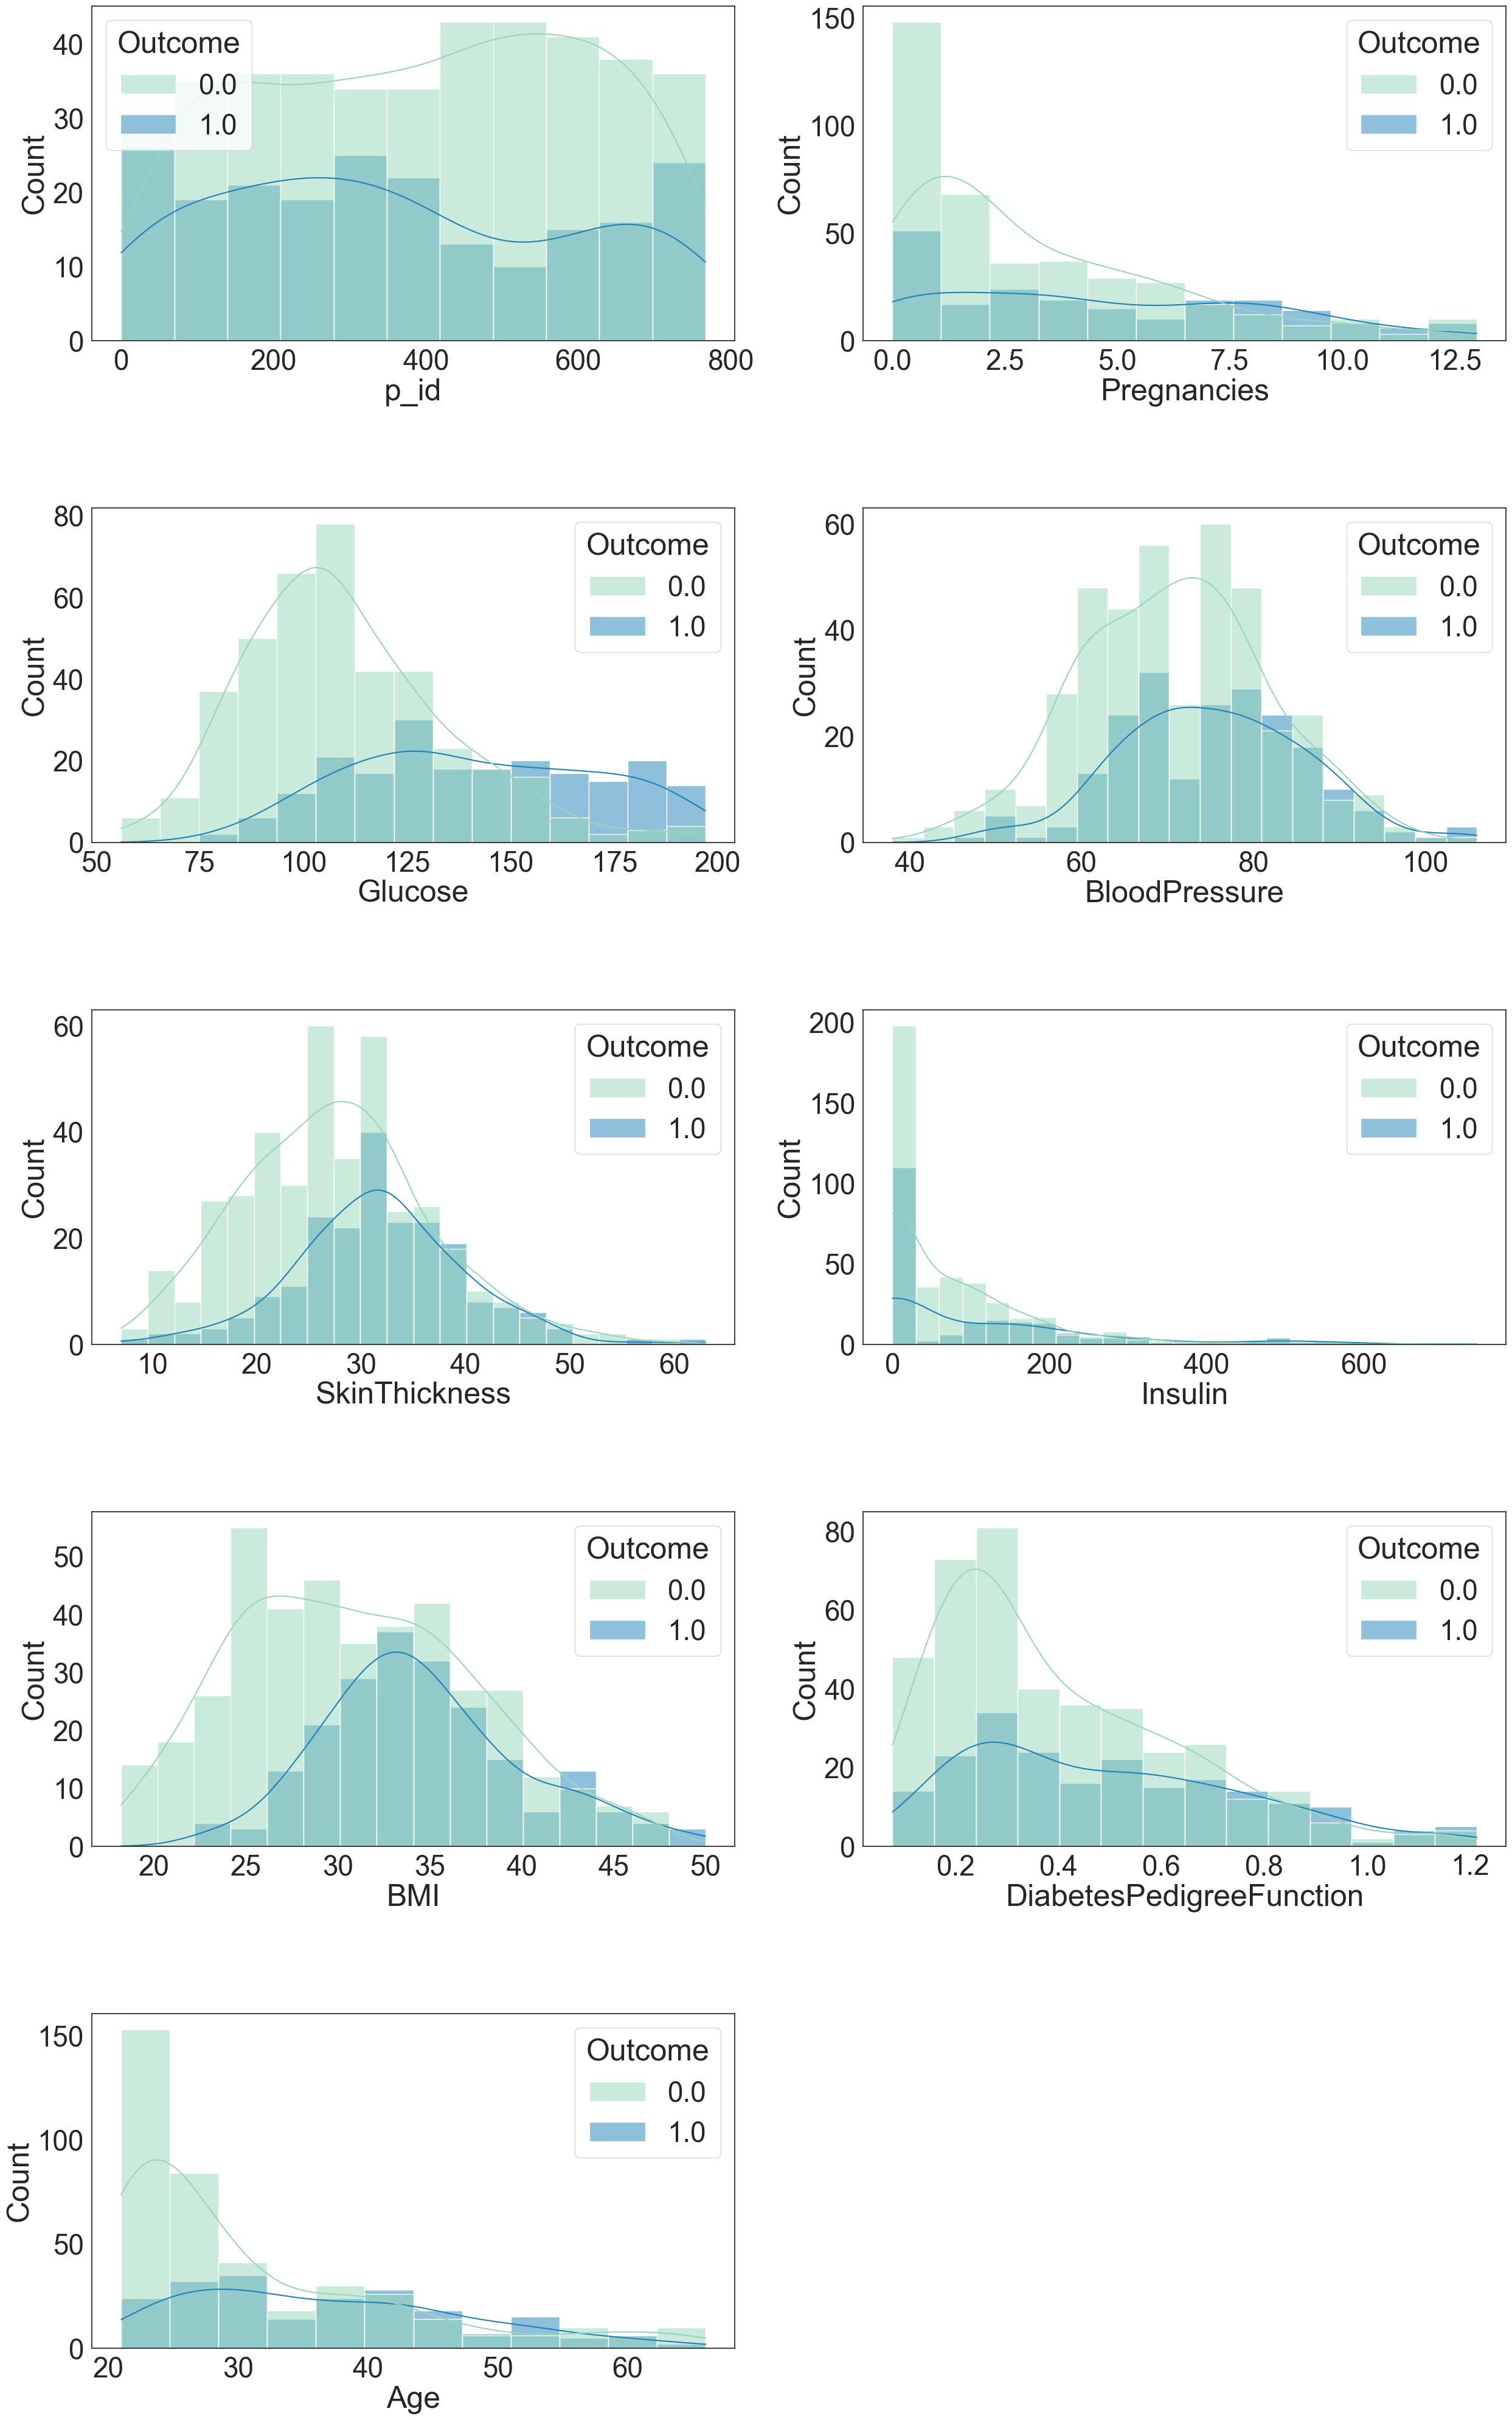

In [16]:
rcParams['figure.figsize'] = 30,50
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=train_df_imp, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

## mensen zonder diabetes worden geoverrepresenteerd in de data

dit kunnen we fixen door synthethische datapunten aan te maken. We maken hier gebruik van een smote-tomek methode.

smote kiest een willekeurig datapunt van de minderheidsklasse en zoekt de nearest neighbors en maakt dan nieuwe data aan tot dat er even veel waardes zijn in beide klassen. Tomek pakt dan willekeurige data van de meerderheidsklasse en zoek de nearest neighbors.

<Axes: >

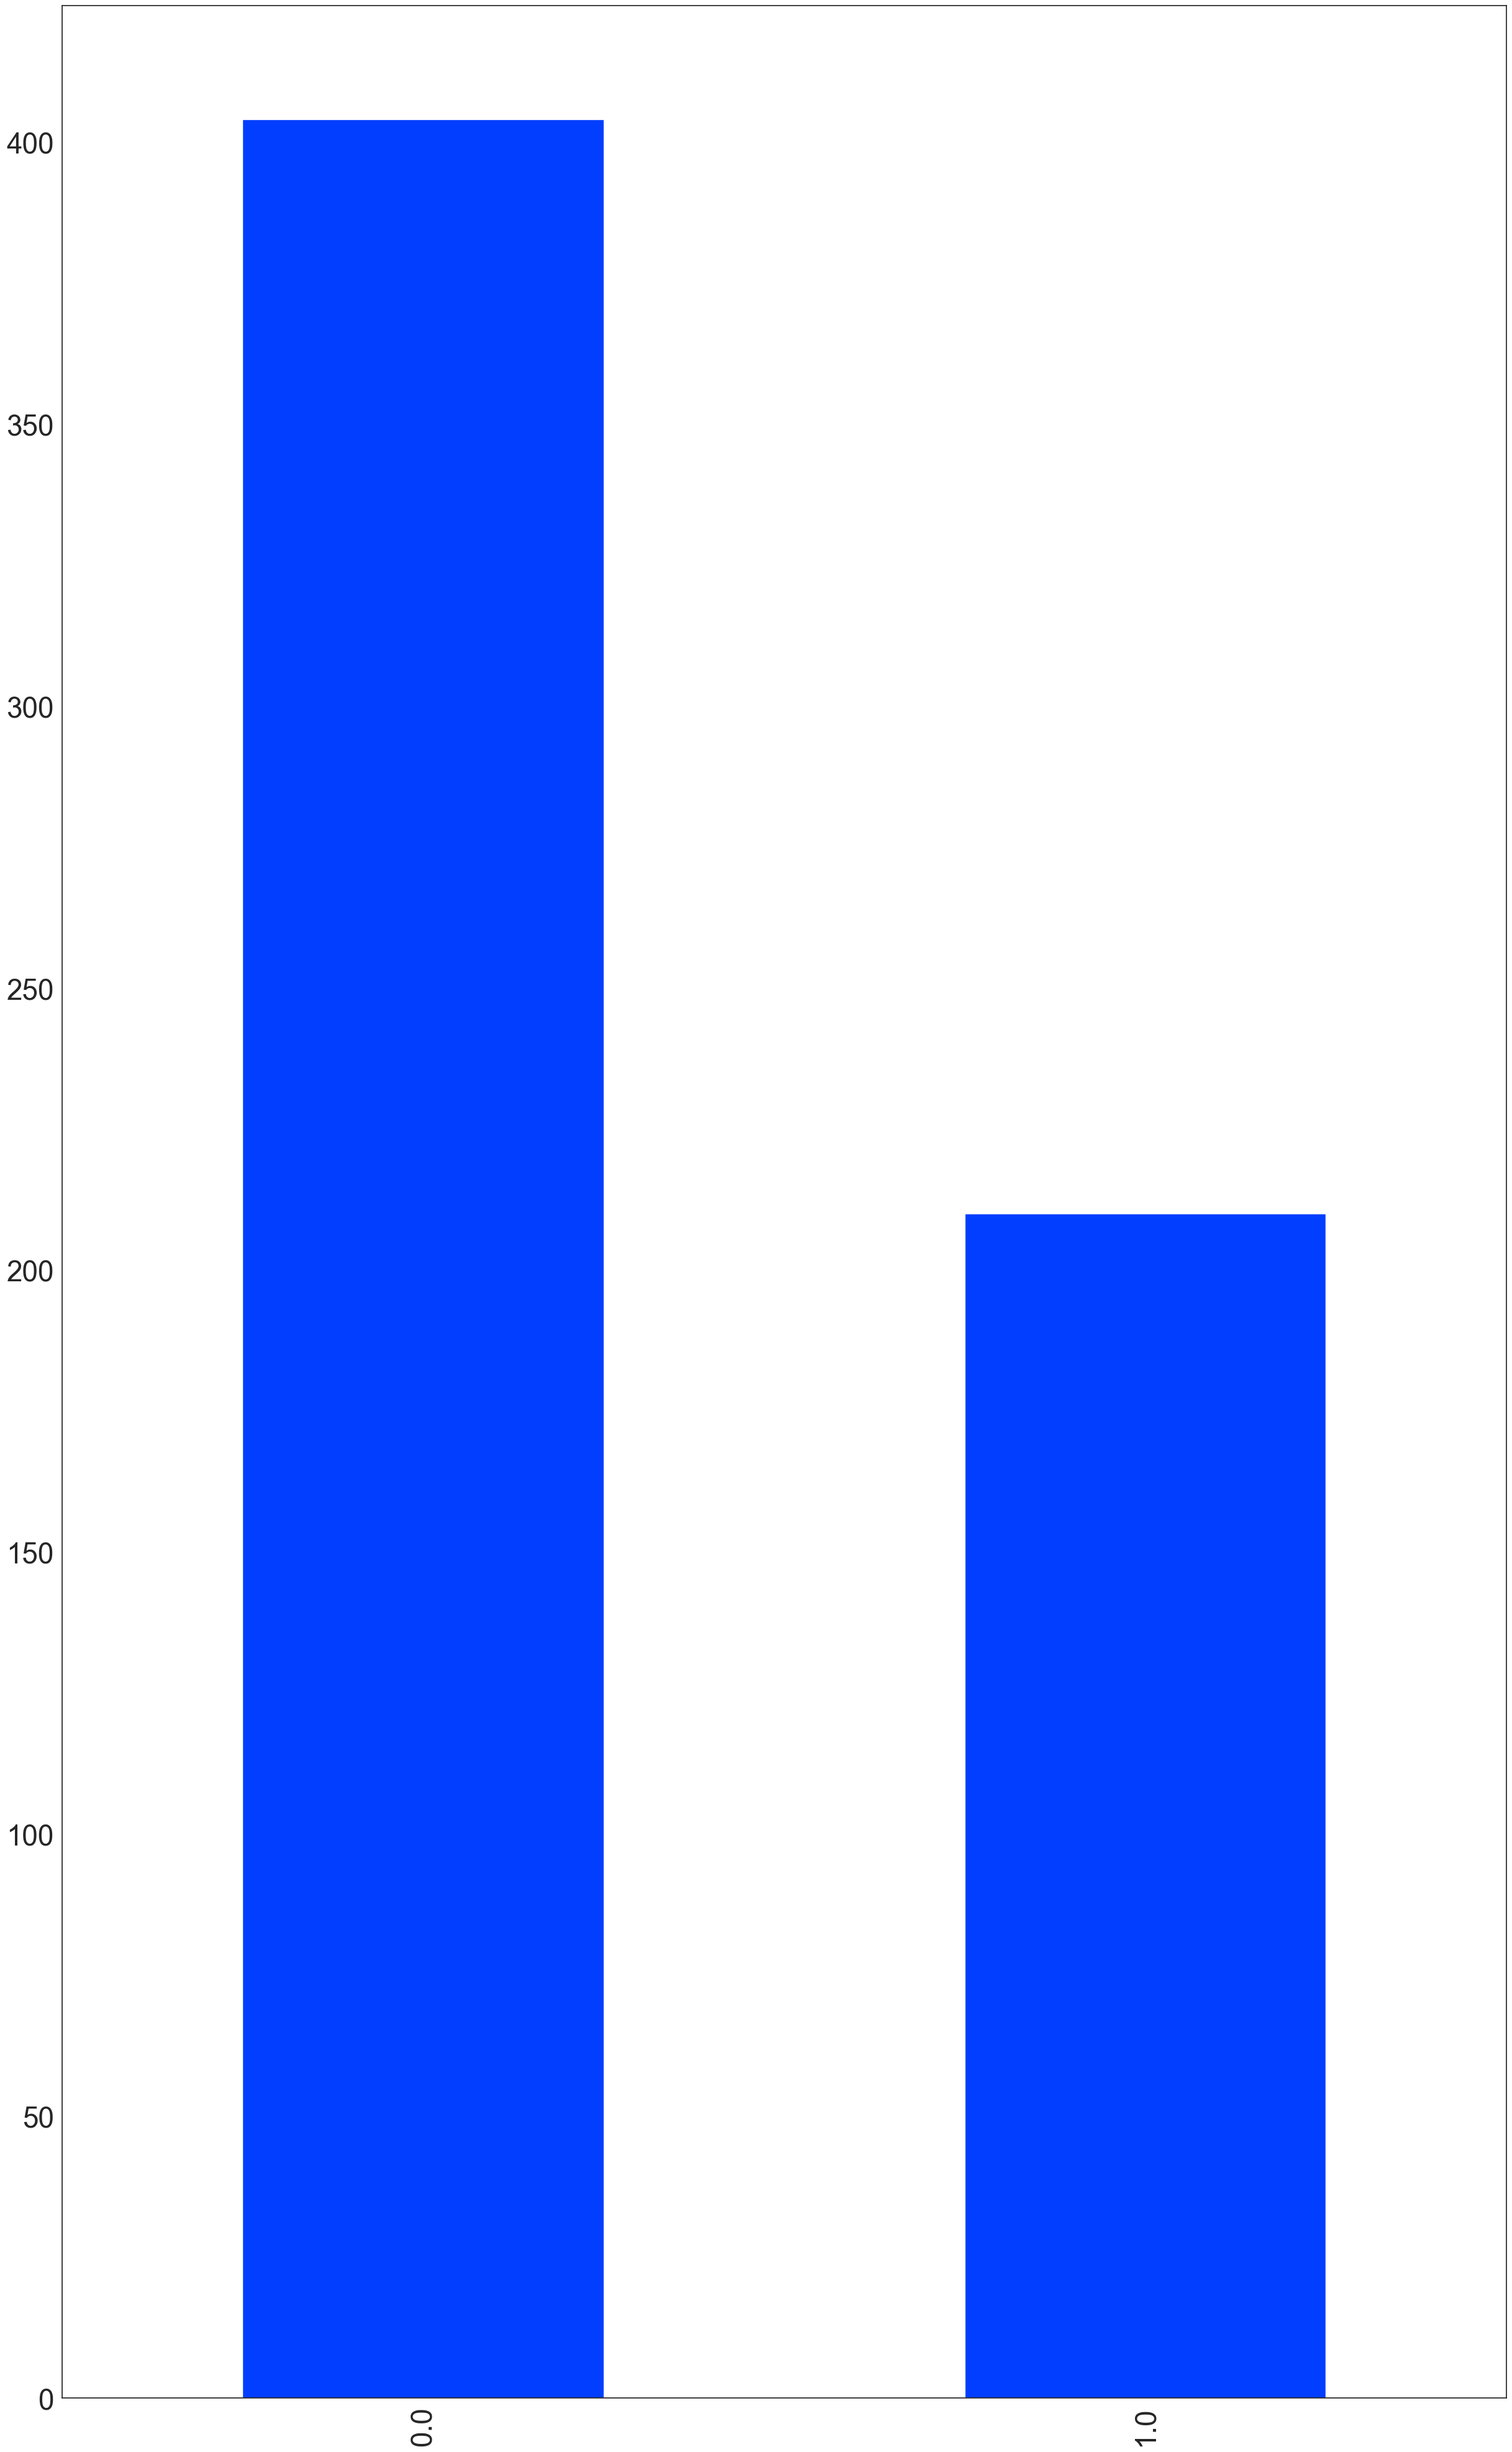

In [17]:
train_df_imp['Outcome'].value_counts().plot(kind='bar')

In [18]:
##X en y maken voor models en data klaarmakenx
X = train_df_imp[x_cols]
y = train_df_imp['Outcome']

C:\Users\akers\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<Axes: >

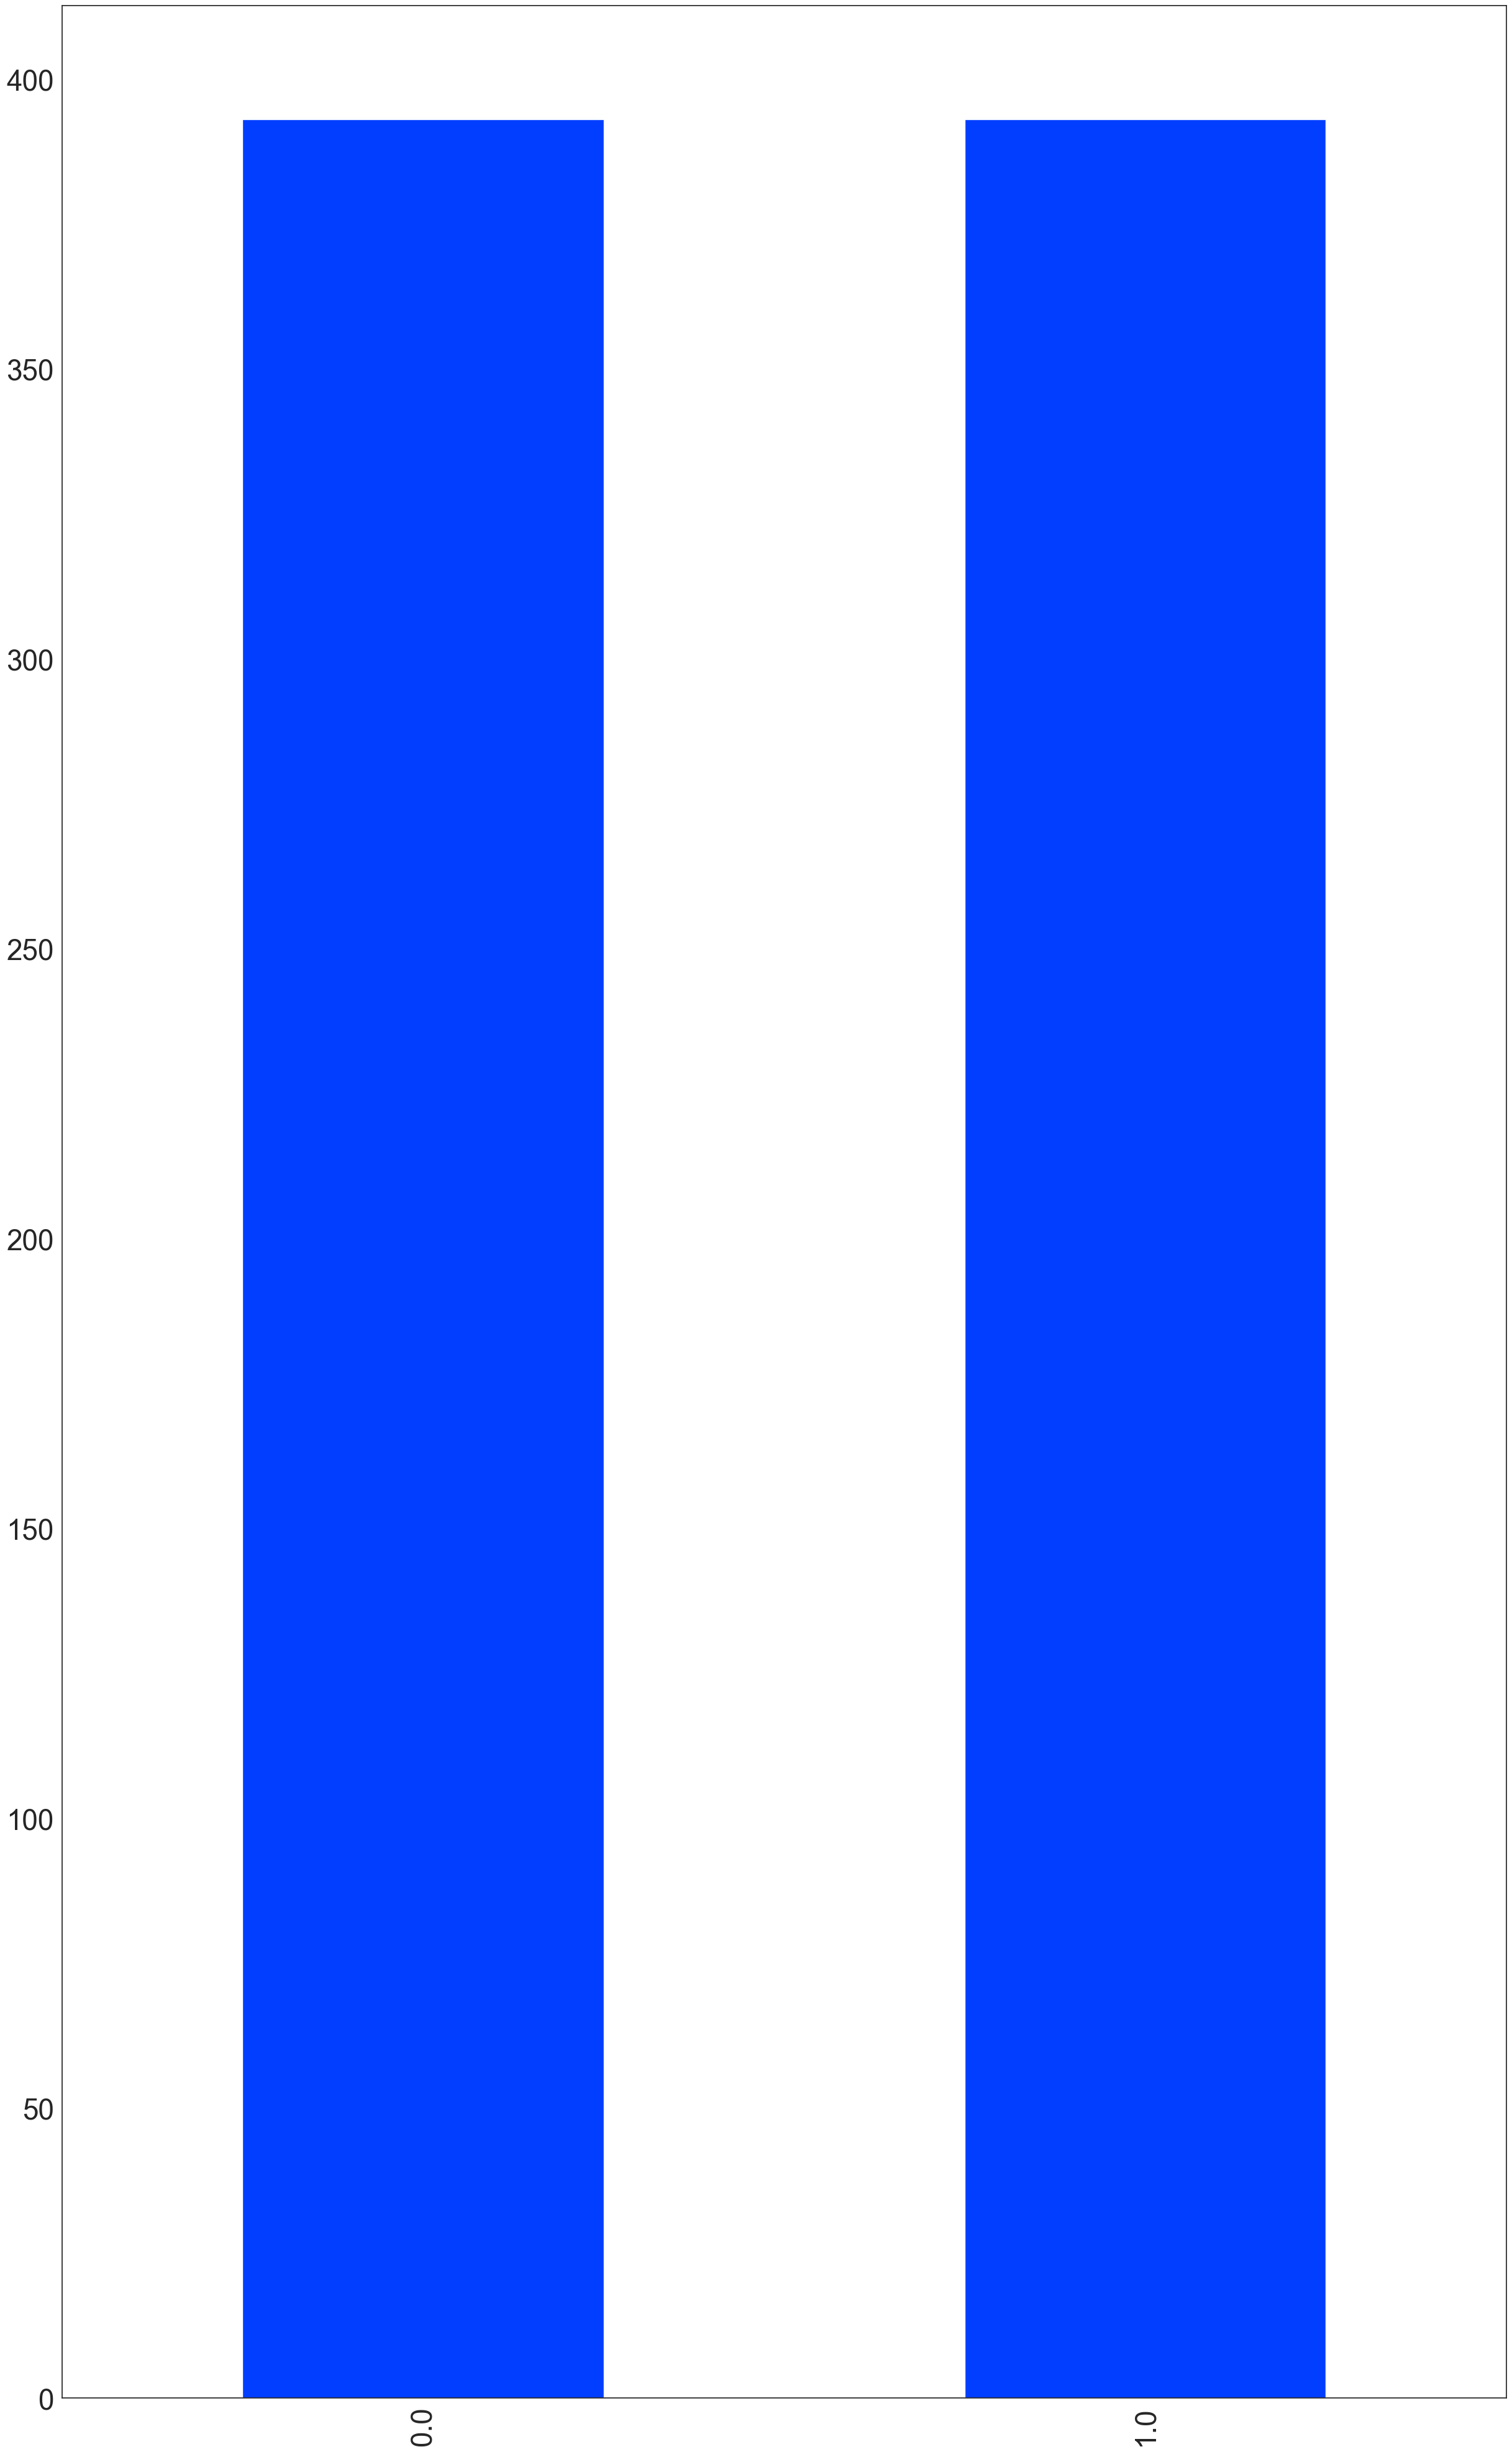

In [19]:
smote = SMOTETomek(sampling_strategy='all', random_state=SEED, n_jobs=-1)
X_sm, y_sm = smote.fit_resample(X, y)

df_model = pd.DataFrame(X_sm, columns=x_cols)
df_model['Outcome'] = y_sm
df_model['Outcome'].value_counts().plot(kind='bar')

In [20]:
df_model.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,98.0,58.0,33.000000,190.0,34.0,0.430,43.0,0.0
1,2.0,112.0,75.0,32.000000,0.0,35.7,0.148,21.0,0.0
2,2.0,108.0,64.0,23.333333,0.0,30.8,0.158,21.0,0.0
3,8.0,107.0,80.0,22.666667,0.0,24.6,0.856,34.0,0.0
4,7.0,136.0,90.0,36.000000,0.0,29.9,0.210,50.0,0.0


In [21]:
stand_df = df_model.copy()
stand_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,98.0,58.0,33.000000,190.0,34.0,0.430,43.0,0.0
1,2.0,112.0,75.0,32.000000,0.0,35.7,0.148,21.0,0.0
2,2.0,108.0,64.0,23.333333,0.0,30.8,0.158,21.0,0.0
3,8.0,107.0,80.0,22.666667,0.0,24.6,0.856,34.0,0.0
4,7.0,136.0,90.0,36.000000,0.0,29.9,0.210,50.0,0.0


### standaardiseren van de data

Hier word de data gestandaardiseerd. We doen dit omdat alle waardes verschillende meetniveaus hebben.

In [22]:
## standaardiseren van de data
x_cols = train_df.columns[1:9]
scale = StandardScaler()
scaled_data = scale.fit_transform(stand_df[x_cols])
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.head()
stand_df['Pregnancies'] = scaled_data_df[0]
stand_df['Glucose'] = scaled_data_df[1]
stand_df['BloodPressure'] = scaled_data_df[2]
stand_df['SkinThickness'] = scaled_data_df[3]
stand_df['Insulin'] = scaled_data_df[4]
stand_df['BMI'] = scaled_data_df[5]
stand_df['DiabetesPedigreeFunction'] = scaled_data_df[6]
stand_df['Age'] = scaled_data_df[7]
stand_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.571616,-0.889677,-1.411712,0.425380,0.873447,0.207128,-0.085139,0.808671,0.0
1,-0.627309,-0.441365,0.191864,0.304802,-0.724085,0.487493,-1.236630,-1.183649,0.0
2,-0.627309,-0.569454,-0.845744,-0.740205,-0.724085,-0.320619,-1.195797,-1.183649,0.0
3,1.171079,-0.601476,0.663503,-0.820590,-0.724085,-1.343127,1.654347,-0.006369,0.0
4,0.871348,0.327171,1.606783,0.787114,-0.724085,-0.469047,-0.983466,1.442590,0.0


### feature engineering

hier manipuleren wij de data zodat het model efficienter kan bepalen wat wat is.

In [23]:
train_df = df_model

In [1]:
##nieuwe features aanmaken die waardes categoriseren.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

train_df["NewBMI"] = NewBMI

train_df.loc[train_df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

train_df.loc[(train_df["BMI"] > 18.5) & (train_df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
train_df.loc[(train_df["BMI"] > 24.9) & (train_df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
train_df.loc[(train_df["BMI"] > 29.9) & (train_df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
train_df.loc[(train_df["BMI"] > 34.9) & (train_df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
train_df.loc[train_df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

NameError: name 'pd' is not defined

In [25]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [26]:
train_df["NewInsulinScore"] = train_df.apply(set_insulin, axis=1)

In [27]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")

train_df["NewGlucose"] = NewGlucose

train_df.loc[train_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

train_df.loc[(train_df["Glucose"] > 70) & (train_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

train_df.loc[(train_df["Glucose"] > 99) & (train_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

train_df.loc[train_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [28]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,98.0,58.0,33.000000,190.0,34.0,0.430,43.0,0.0,Obesity 1,Abnormal,Normal
1,2.0,112.0,75.0,32.000000,0.0,35.7,0.148,21.0,0.0,Obesity 2,Abnormal,Overweight
2,2.0,108.0,64.0,23.333333,0.0,30.8,0.158,21.0,0.0,Obesity 1,Abnormal,Overweight
3,8.0,107.0,80.0,22.666667,0.0,24.6,0.856,34.0,0.0,Normal,Abnormal,Overweight
4,7.0,136.0,90.0,36.000000,0.0,29.9,0.210,50.0,0.0,Overweight,Abnormal,High


In [29]:
train_df = pd.get_dummies(train_df, columns=['NewBMI', 'NewInsulinScore', 'NewGlucose'], drop_first=True)

In [30]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6.0,98.0,58.0,33.000000,190.0,34.0,0.430,43.0,0.0,1,0,0,0,0,0,0,1,0
1,2.0,112.0,75.0,32.000000,0.0,35.7,0.148,21.0,0.0,0,1,0,0,0,0,0,0,1
2,2.0,108.0,64.0,23.333333,0.0,30.8,0.158,21.0,0.0,1,0,0,0,0,0,0,0,1
3,8.0,107.0,80.0,22.666667,0.0,24.6,0.856,34.0,0.0,0,0,0,0,0,0,0,0,1
4,7.0,136.0,90.0,36.000000,0.0,29.9,0.210,50.0,0.0,0,0,0,1,0,0,0,0,0


In [31]:
#categorise data en normale data apart halen
cat_df = train_df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight']]

In [32]:
#outcome uit de data halen
concat_df = stand_df.drop('Outcome', axis=1)

In [33]:
#cat data en normale data samenvoegen voor een train dataframe
X_df = pd.concat([concat_df, cat_df], axis=1)

In [34]:
X_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,0.571616,-0.889677,-1.411712,0.425380,0.873447,0.207128,-0.085139,0.808671,1,0,0,0,0,0,0,1,0
1,-0.627309,-0.441365,0.191864,0.304802,-0.724085,0.487493,-1.236630,-1.183649,0,1,0,0,0,0,0,0,1
2,-0.627309,-0.569454,-0.845744,-0.740205,-0.724085,-0.320619,-1.195797,-1.183649,1,0,0,0,0,0,0,0,1
3,1.171079,-0.601476,0.663503,-0.820590,-0.724085,-1.343127,1.654347,-0.006369,0,0,0,0,0,0,0,0,1
4,0.871348,0.327171,1.606783,0.787114,-0.724085,-0.469047,-0.983466,1.442590,0,0,0,1,0,0,0,0,0


## conclusie EDA:

- De data had geen nans maar wel nul waardes die niet mogelijk zouden moeten zijn. Waardes zoals een BMI van nul.
- Meeste data moest gestandaardiseerd worden.
- De data bevat minder mensen met diabetes dan menzen zonder. Samen met de nul waardes zijn er extra synthethische waardes toegevoegd om dit te balanceren.

# opdracht 2: Evaluatie

- De vorm van machine learning die we hier gebruiken is supervised learning. Er worden namelijk test sets gebruikt om een model te trainen
- We hebben met deze opdracht te maken met een classificatie probleem. bij dit soort problemen hebben we een aantal metrics om modellen te evalueren

De belangerijkste metrics zijn deze:
- Accuracy: Deze metric geeft aan hoe veel van de voorspellingen juist zijn
- precision: Deze metric word gebruikt om te meten hoe veel "true positives" je hebt ten opzichte van "false negatives"
- recall: Deze metric meet hoe veel positieve waardes daadwerkelijk positief zijn
- f1-score: Deze metric is het gemiddelde van precision en recall
- de eerder genoemde false positives en negatives zijn uit te beelden in een "confusion matrix" Deze laat zien of je voorspelling juist zijn en hoe de verdeling is tussen goede en slechte voorspellingen
- ook laat deze confusion matrix zien waar je model beter in is

Wij willen een zo hoog mogelijke recall score omdat we "false negatives" willen minimaliseren. False negatives geeft aan dat er voorspelt wordt dat de patiënt geen diabetes heeft, terwijl hij eigenlijk wel heeft. Dus we willen zo min mogelijk false negatives hebben, en dat geeft ons een hogere recall score.

[Confusion Matrix](https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5)
![1_3yGLac6F4mTENnj5dBNvNQ%5B1%5D.jpeg](attachment:1_3yGLac6F4mTENnj5dBNvNQ%5B1%5D.jpeg)

$$Precision\space{} = \frac{TP}{(TP + FP)}$$<br>
$$Recall\space{} = \frac{TP}{(TP + FN)}$$<br>
$$F1\space{}score\space{} = \frac{2 * Precision * Recall}{Precision + Recall}$$<br>
$$Accuracy\space{} = \frac{Number\space{} of\space{} correct predictions}{Total\space{} number\space{} of\space{} predictions}$$

## opdracht 3: modelleren

In [35]:
##x en y maken voor modellen
X = X_df
y = df_model['Outcome']

#### Logistic Regression

Een logistische regressie model is een model waarbij je via features kan voorspellen wat de variabel hoort te zijn, mits de variabel dichotoom (binair zoals in dit project wel of geen diabetes) is. De logistische regressie lijkt veel op de lineaire regressie, je probeert namelijk bij een logistische regressie de uitkomst te transformeren zodat je er zelfde soort uitvoering kan toepassen als bij een lineaire regressie. Een logistische regressie heeft wel minder voorwaarden. Hoewel de variabel waar je de uitkomst van wil weten dichotoom moet zijn, modelleert de logistische regressie niet de dichotome maar het modelleert de kans van die uitkomst. Een kans ligt altijd tussen de 0 en 1 maar bij een lineaire regressie kan dat niet want hier moeten de waardes continu zijn. Daarom gebruiken we iets anders dan de kans en dat is de relatieve kans. Dit doen we omdat de relatieve kans van 0 tot eindig kan lopen, alleen is hier nog wel een laatste probleem en dat is dat uitkomst niet onder de 0 kan zitten. Hiervoor is het laatste trucje en dat is in plaats van de relatieve kans te gebruiken gebruiken we de natuurlijke logaritme van de relatieve kans, ook wel logit genoemd. Hierdoor kunnen de waarden alles zijn. De formule voor een logistische regressie zijn er als volgt uit:(Logistische regressie - Wikistatistiek, z.d.)  

![image.png](attachment:image.png)

Loss is een maatstaf voor het aantal fouten dat je model maakt.<br>
We definiëren een functie om de loss te meten en trainen vervolgens onze modellen om deze loss in onze dataset te minimaliseren.

Loss functie voor regressie is:

$$ Mean\space{}Squared\space{}Error = \frac{\Sigma(y_{true}) - y_{pred})^{2}}{n}$$<br>
$$ Root\space{}Mean\space{}Squared\space{}Error = \sqrt{\frac{\Sigma(y_{true}) - y_{pred})^{2}}{n}}$$<br>
$$ Mean\space{}Absolute\space{}Error = \frac{\Sigma|(y_{true}) - y_{pred})|}{n}$$

"above explanation"

Loss functie voor classificatie is:

$$Log\space{}Loss = -\frac{1}{N} \sum\limits_{i=1}^{N} [y_{true} log(y_{pred}) + (1 - y_{true}) log(1 - y_{pred})$$<br>
- y_true is 1 of 0 (positief of negatief)
- y_pred is een kans tussen 0 en 1
- Loss functie - "cross-entropy loss" of "logistic loss"

"above explanation"

"gradient descent"
"reken voorbeeld"
"relevante formule toepassen"

"vormen van regularisatie die van toepassing zijn op dit model"
"aan de hand van wiskunde formules hoe elk vorm werkt en het effect erop"
"hoe verhoudt regularisatie zich ten opzichte van overfitting?"

In [36]:
# logreg model maken en alle params voor tuning
logreg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [37]:
## tunen van het model en best paramaters printen 
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=SEED)
grid_search = GridSearchCV(estimator = logreg, param_grid = grid, n_jobs = -1, cv=cv, scoring ='accuracy')
grid_result = grid_search.fit(X, y)
print(grid_result.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


beste parameters zijn dus: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [38]:
## tuned logreg model met de beste parameters
logreg_tuned = LogisticRegression(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [39]:
cross_val_score(logreg_tuned, X, y, cv = 10).mean()

0.778708211619604

#### Decision Tree

Decision Tree start met een root node en split de data continu in subsets afhankelijk van de features. De nodes tussen het begin en eind zijn de internal nodes, hetzelfde hoe de root node is verdeeld in twee nodes, so ook voor de internal nodes afhankelijk van de features. En aan het eind komt de leaf nodes. Dat is een Decision Tree. Dus wanneer er predictions wordt gemaakt, loopt het afhankelijk van de features vanaf de root node door totdat het bij een leaf node komt.<br>
De keuze wordt gemaakt door het vergelijken van de feature value van de input data met de drempelwaarde, dan loopt het naar de volgende internal node or leaf node.

In [40]:
# decision tree model maken en alle params voor tuning
dt = DecisionTreeClassifier(random_state=SEED)
criterions = ['gini', 'entropy', 'log_loss']
splitters = ['best', 'random']
depths = [1, 5, 10, 100, None]
samples = [2, 5, 10]

In [41]:
## tunen van het model en best paramaters printen 
grid = dict(criterion = criterions, splitter = splitters, max_depth = depths, min_samples_split = samples)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator= dt, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print(grid_result.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10, 'splitter': 'best'}


beste parameters zijn dus: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}

In [42]:
dt_tuned = DecisionTreeClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [43]:
cross_val_score(dt_tuned, X, y, cv=100).mean()

0.8025000000000001

#### Random Forest

Random Forest maakt een aantal Decision Trees en gebruikt het gemiddelde om de voorspelling nauwkeuriger te hebben. Dit verbetert ook de performance, dus het is beter dan om met een Decision Tree alleen te werken.

In [44]:
# random forrest model maken en alle params voor tuning
# we kunnen hier bijna dezelfde params gebruiken als decision tree
rf = RandomForestClassifier(random_state=SEED)
criterions = ['gini', 'entropy', 'log_loss']
max_fts = ['sqrt', 'log2', None]
depths = [1, 5, 10, 100, None]
samples = [2, 5, 10]

In [45]:
## tunen van het model en best paramaters printen 
grid = dict(criterion = criterions, max_depth = depths, min_samples_split = samples, max_features = max_fts)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator= rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print(grid_result.best_params_)

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 2}


beste params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2}

In [46]:
rf_tuned = RandomForestClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [47]:
cross_val_score(rf_tuned, X, y, cv=100).mean()

0.8560714285714286

#### Gradient boosting

Gradient Boosting kan met verschillende modellen werken. Neem Decision Tree als voorbeeld. Gradient Boosting start met 1 Tree (dit is het huidige model), nadien wordt de errors, die resten wordt genoemd, berekend. De nieuwe Tree (weak learner) zal deze errors voorspellen om nieuwe patterns te vinden. De voorspelling van de weak learner wordt dan toegevoegd aan het huidige model, daardoor wordt de voorspelling verbeterd. De bijdrage van elk weak learner wordt gewogen door middel van zijn prestatie. De uiteindelijke voorspelling wordt gemaakt door de voorspellingen van alle weak learners samen te voegen, elk gewogen door zijn prestatie in het verminderen van de residuen.

In [48]:
gb = GradientBoostingClassifier(random_state=SEED)
loss_func = ['log_loss', 'exponential']
rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]
estimators = [1, 2, 5, 10, 100]
crit = ['friedman_mse', 'squared_error']
depths = [1, 5, 10, 100, None]

In [49]:
grid = dict(loss = loss_func, learning_rate = rate, n_estimators = estimators,
             criterion = crit,
            max_depth = depths)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator=gb, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X,y)
print(grid_result.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 10, 'n_estimators': 100}


beste params {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 0.2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100, 'subsample': 0.7}

In [50]:
gb_tuned = GradientBoostingClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [51]:
cross_val_score(gb_tuned, X, y, cv=10).mean()

0.8309802012333659

#### ADA Boosting

Alle training examples krijgen hetzelfde gewicht, daarna worden ze iterated. Bij elke iteratie wordt het gewicht aangepast door de vorige voorspellingen van de weak learners. Verder wordt er getraind op de training data met het huidig gewicht. De weak learner let op de examples die verkeerd geclassificeerd zijn, omdat zij een hogere gewicht krijgen. Nadat de weak learner getraind is, berekent ADA Boost een gewicht op basis van zijn nauwkeurigheid.

In [52]:
ADA = AdaBoostClassifier(random_state=SEED)
estimators = [1, 2, 5, 10, 100]
rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]
algo = ['SAMME', 'SAMME.R']

In [53]:
grid = dict(n_estimators = estimators, learning_rate=rate, algorithm=algo)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator=ADA, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X,y)
print(grid_result.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 100}


beste params: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

In [54]:
ADA_tuned = AdaBoostClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [55]:
cross_val_score(ADA_tuned, X, y, cv=10).mean()

0.8017039922103212

#### SVM

In [56]:
SVM = SVC(random_state=SEED)
c_values = [100, 10, 1.0, 0.1, 0.01]
kernels = ['poly', 'rbf', 'sigmoid']
gammas = ['scale', 'auto']
decision_function = ['ovo', 'ovr']

In [57]:
grid = dict(C=c_values, kernel=kernels, gamma=gammas,
            decision_function_shape=decision_function)
grid_search = GridSearchCV(estimator=SVM, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X,y)
print(grid_result.best_params_)

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}


beste params: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'sigmoid'}

In [58]:
SVM_tuned = SVC(**grid_result.best_params_, random_state=SEED, probability=True)

In [59]:
cross_val_score(SVM_tuned, X, y, cv=10).mean()

0.813047711781889

#### Ensemble

In [60]:
eclf_hard = VotingClassifier(estimators=[('rf', rf_tuned),
                                         ('gb', gb_tuned),
                                         ('svm', SVM_tuned)], voting='hard').fit(X,y)
eclf_soft = VotingClassifier(estimators=[('rf', rf_tuned),
                                         ('gb', gb_tuned),
                                         ('svm', SVM_tuned)], voting='soft').fit(X,y)

In [61]:
hard_score = cross_val_score(eclf_hard, X, y, cv=10).mean()
soft_score = cross_val_score(eclf_soft, X, y, cv=10).mean()
print('Hard score: ', hard_score)
print('Soft score: ', soft_score)

Hard score:  0.8461700746510873
Soft score:  0.8411554690035702


#### model naar keuze:  Gaussian Naive Bayes

er zijn geen parameters om te tunen bij dit model.

In [62]:
gnm = GaussianNB().fit(X,y)

In [63]:
cross_val_score(gnm, X, y, cv=10).mean()

0.5279941577409931

### prediction

In [64]:
for x in ['Pregnancies']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['Glucose']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['BloodPressure']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['SkinThickness']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['BMI']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['DiabetesPedigreeFunction']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['Age']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

In [65]:
test_df.isna().sum()

p_id                        0
Pregnancies                 2
Glucose                     1
BloodPressure               6
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    8
Age                         2
dtype: int64

In [66]:
## nul waardes uit de desbetreffende features vervangen met nan
test_df[['Glucose','BloodPressure','SkinThickness','BMI']] = test_df[['Glucose',
                                                                                 'BloodPressure','SkinThickness','BMI']].replace(0, np.NaN)

In [67]:
## alle nans imputen
imputer = KNNImputer(n_neighbors=3, weights='uniform')
imputed = imputer.fit_transform(test_df)
test_df_imp = pd.DataFrame(imputed, columns=test_df.columns)
test_df_imp.head()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
1,4.0,0.0,137.0,40.0,35.0,168.0,43.1,0.680,33.0
2,13.0,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0
3,14.0,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
4,20.0,3.0,126.0,88.0,41.0,235.0,39.3,0.704,27.0


In [68]:
## standaardiseren van de data
scale = StandardScaler()
scaled_data = scale.fit_transform(test_df_imp[x_cols])
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.head()
test_df_imp['Pregnancies'] = scaled_data_df[0]
test_df_imp['Glucose'] = scaled_data_df[1]
test_df_imp['BloodPressure'] = scaled_data_df[2]
test_df_imp['SkinThickness'] = scaled_data_df[3]
test_df_imp['Insulin'] = scaled_data_df[4]
test_df_imp['BMI'] = scaled_data_df[5]
test_df_imp['DiabetesPedigreeFunction'] = scaled_data_df[6]
test_df_imp['Age'] = scaled_data_df[7]
test_df_imp.head()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,-0.925677,-1.251669,-0.448446,-0.000246,-0.685277,-0.832356,-0.342717,-0.156551
1,4.0,-1.250649,0.452695,-2.727096,0.681867,0.870214,1.601216,1.099123,0.036577
2,13.0,-0.925677,2.157060,-0.974288,-0.682359,7.147733,-0.316144,-0.136739,2.547249
3,14.0,0.374210,1.403206,0.077397,-1.137102,0.935026,-0.950348,0.691552,1.774734
4,20.0,-0.275734,0.092157,1.479643,1.363980,1.490559,1.040757,1.204303,-0.542808


In [69]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

test_df["NewBMI"] = NewBMI

test_df.loc[test_df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

test_df.loc[(test_df["BMI"] > 18.5) & (test_df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
test_df.loc[(test_df["BMI"] > 24.9) & (test_df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
test_df.loc[(test_df["BMI"] > 29.9) & (test_df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
test_df.loc[(test_df["BMI"] > 34.9) & (test_df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
test_df.loc[test_df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [70]:
test_df["NewInsulinScore"] = test_df.apply(set_insulin, axis=1)

In [71]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")

test_df["NewGlucose"] = NewGlucose

test_df.loc[test_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

test_df.loc[(test_df["Glucose"] > 70) & (test_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

test_df.loc[(test_df["Glucose"] > 99) & (test_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

test_df.loc[test_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [72]:
test_df = pd.get_dummies(test_df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [73]:
cat_df_test = test_df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight']]

In [74]:
p_id = test_df['p_id']
test_df_imp = test_df_imp.drop('p_id', axis=1)

In [75]:
pred_df = pd.concat([test_df_imp, cat_df_test], axis=1)
pred_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,-0.925677,-1.251669,-0.448446,-0.000246,-0.685277,-0.832356,-0.342717,-0.156551,0,0,0,1,0,0,0,1,0
1,-1.250649,0.452695,-2.727096,0.681867,0.870214,1.601216,1.099123,0.036577,0,0,1,0,0,0,0,0,0
2,-0.925677,2.157060,-0.974288,-0.682359,7.147733,-0.316144,-0.136739,2.547249,1,0,0,0,0,0,0,0,0
3,0.374210,1.403206,0.077397,-1.137102,0.935026,-0.950348,0.691552,1.774734,0,0,0,1,0,0,0,0,0
4,-0.275734,0.092157,1.479643,1.363980,1.490559,1.040757,1.204303,-0.542808,0,1,0,0,0,0,0,0,1


In [76]:
#prediction maken
pred = gb_tuned.predict(pred_df)

In [77]:
pred_df = pd.DataFrame(pred)
p_id_df = pd.DataFrame(p_id)
ans = pd.concat([p_id_df, pred_df], axis=1)
ans = ans.rename(columns = {0: 'p_id', 0: 'Outcome'})
ans.to_csv('Submission.csv', index = False)

## Bevindingen

## Conclusie en aanbevelingen

Logistische regressie - Wikistatistiek. (z.d.). https://wikistatistiek.amc.nl/Logistische_regressie

Slides - Loss, metrics, underfitting, overfitting - V. Radhakrishnan
https://brightspace.hhs.nl/content/enforced/56591-ADSAI-MACHI-23_2023_VT/Lecture%20-%20Loss,%20metrics,%20over%20&%20underfitting.pdf?_&d2lSessionVal=8tkyX7htqHec8sZqio6Ej8nmT

StatQuest with Josh Starmer. (2019, 5 februari). Gradient descent, Step-by-Step [Video]. YouTube. https://www.youtube.com/watch?v=sDv4f4s2SB8

Akalin, A. (2020, 30 september). 5.13 Logistic Regression and Regularization | Computational Genomics with R. https://compgenomr.github.io/book/logistic-regression-and-regularization.html

ChatGPT. (2023). Prompt 1: SVM. ChatGPT. https://chat.openai.com/share/1e5d05d3-8578-4807-85c0-44c3edc334bd

Viadinugroho, R. a. A. (2022, January 7). Imbalanced classification in Python: SMOTE-Tomek Links Method. Medium. https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

Importance of feature engineering in model building. (n.d.). https://www.tutorialspoint.com/importance-of-feature-engineering-in-model-building